## Logistic regresion for Student Performance data:

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler



In [ ]:
# Read data from excel file
df = pd.read_csv('Student_performance_data.csv')

# Preview data
display(df.head())

# Data Info
display(df.info())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


None

## Explanitory Data

In [3]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


## Histogram Visualization 

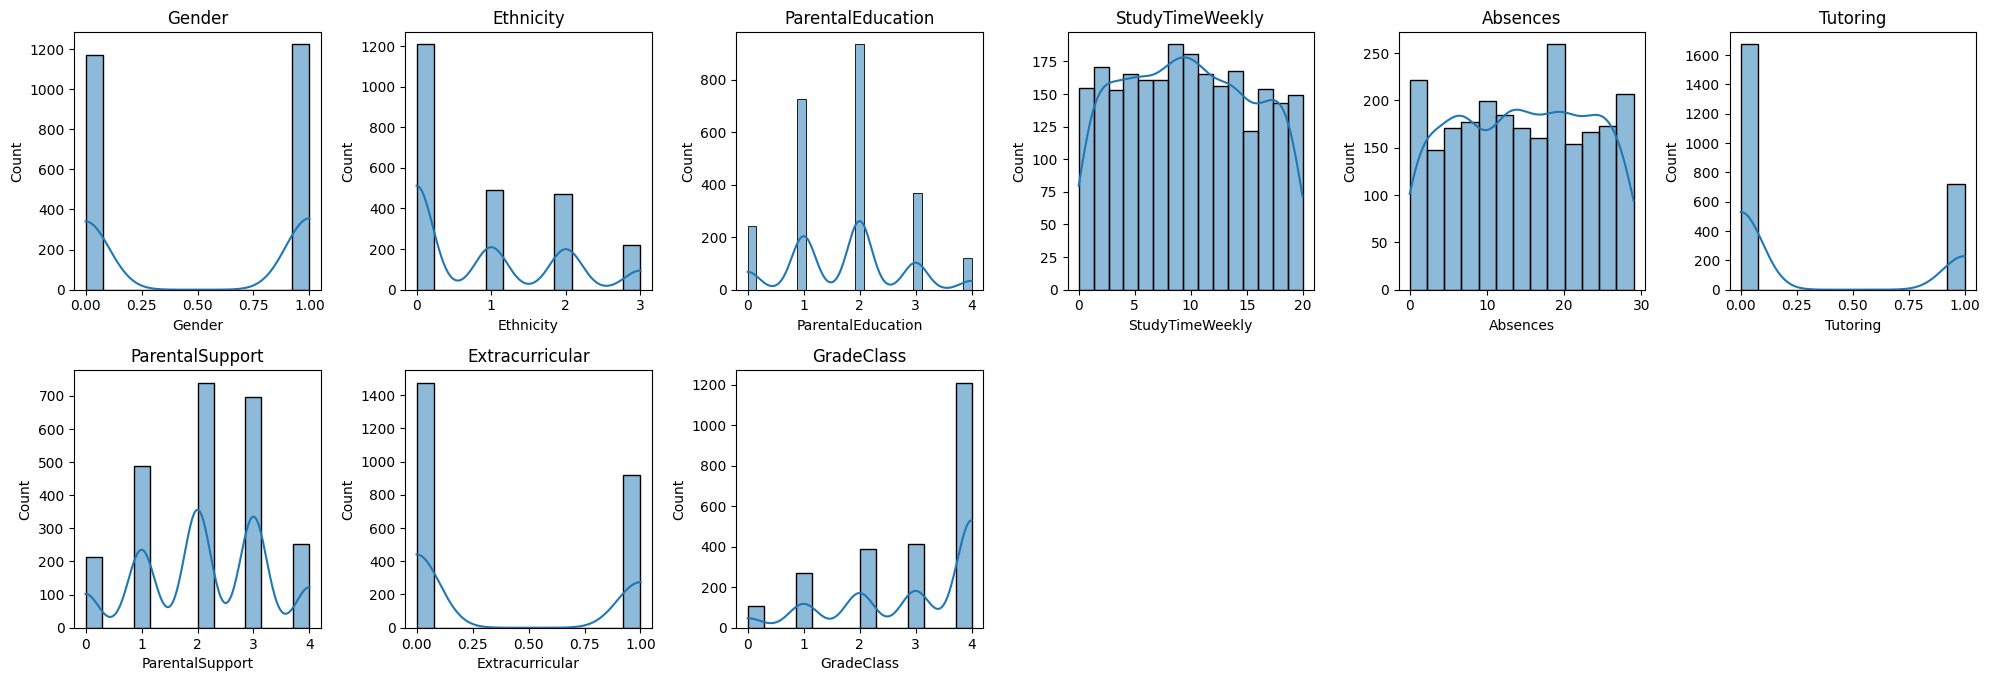

In [4]:
# Exclude unneeded variables
df_cleaned = df.drop(columns=[
    'Age','GPA', 'Music', 'Volunteering',
    'Sports', 'StudentID'
])
# Outer Figure Size
plt.figure(figsize=(20, 20))
for i, col in enumerate(df_cleaned.columns):
# Inner Layout    
    plt.subplot(6, 6, i+1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

## Box Plot Visualization 

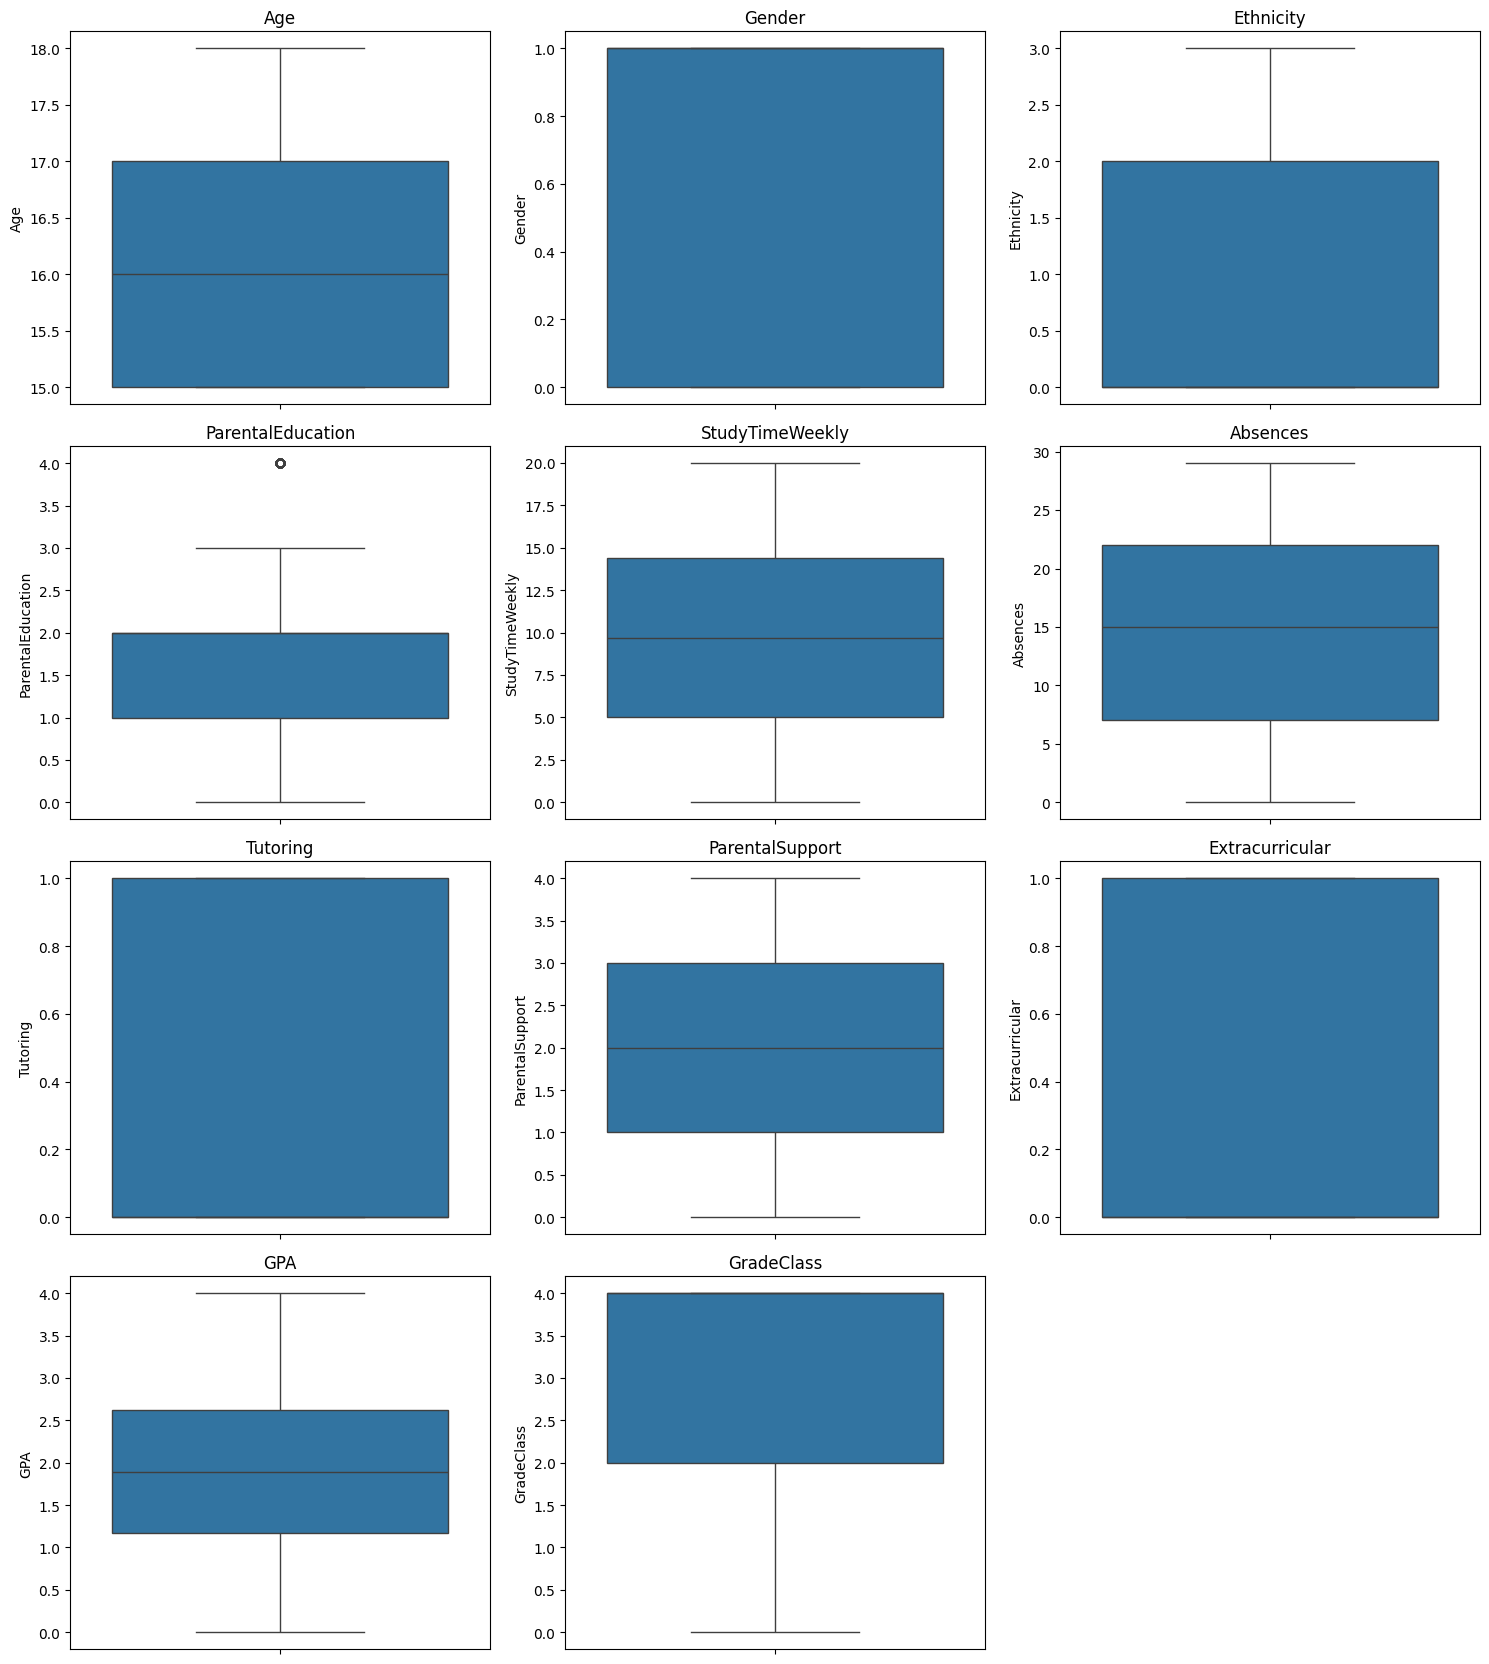

In [5]:
# Exclude unneeded variables
df_cleaned = df.drop(columns=[
   'Music', 'Volunteering','Sports', 'StudentID'
])
# Outer Figure Size
plt.figure(figsize=(15, 25))
for i, col in enumerate(df_cleaned.columns):
# Inner Layout    
    plt.subplot(6, 3, i+1)
    sns.boxplot(df_cleaned[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

## Scatter plot Visualization 

<Axes: xlabel='Age', ylabel='GPA'>

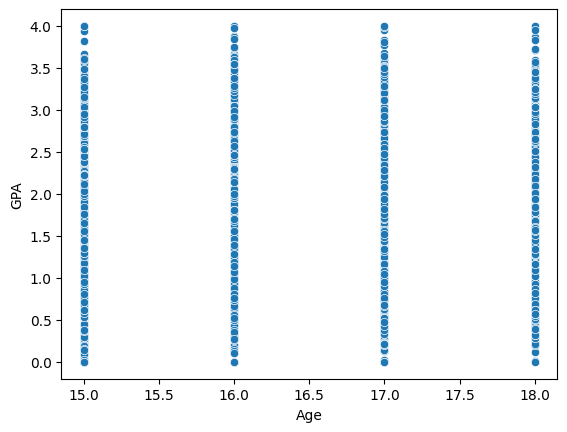

In [6]:
sns.scatterplot(data=df, x='Age', y='GPA')

<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

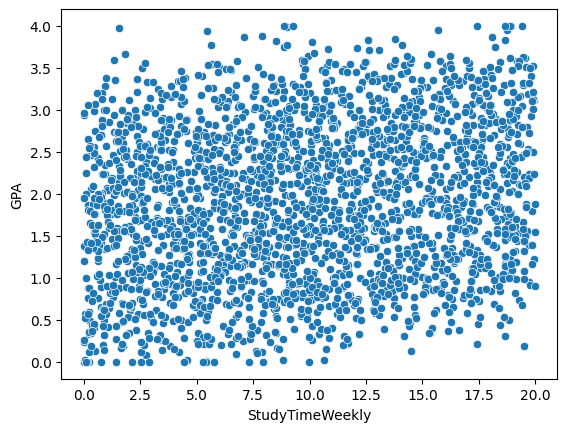

In [7]:
sns.scatterplot(data=df, x='StudyTimeWeekly', y='GPA')

<Axes: xlabel='Absences', ylabel='GPA'>

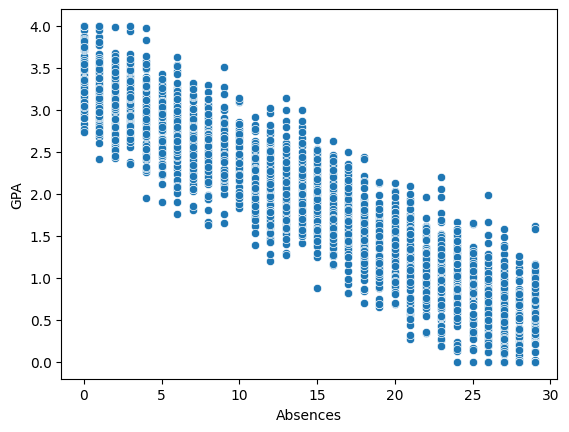

In [8]:
sns.scatterplot(data=df, x='Absences', y='GPA')

<Axes: xlabel='Tutoring', ylabel='GPA'>

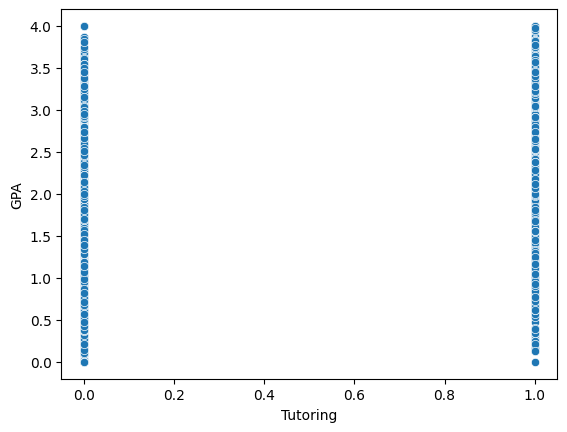

In [9]:
sns.scatterplot(data=df, x='Tutoring', y='GPA')

<Axes: xlabel='ParentalSupport', ylabel='GPA'>

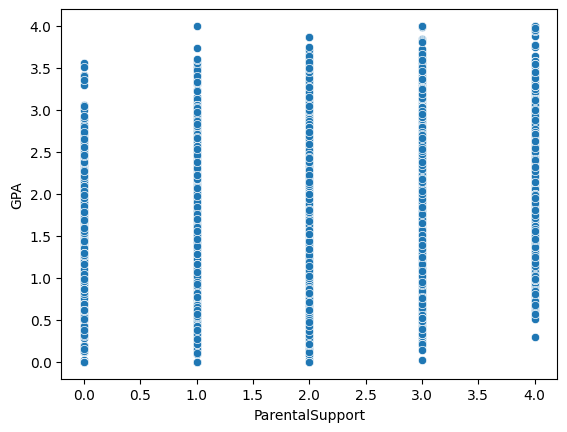

In [10]:
sns.scatterplot(data=df, x='ParentalSupport', y='GPA')

<Axes: xlabel='Extracurricular', ylabel='GPA'>

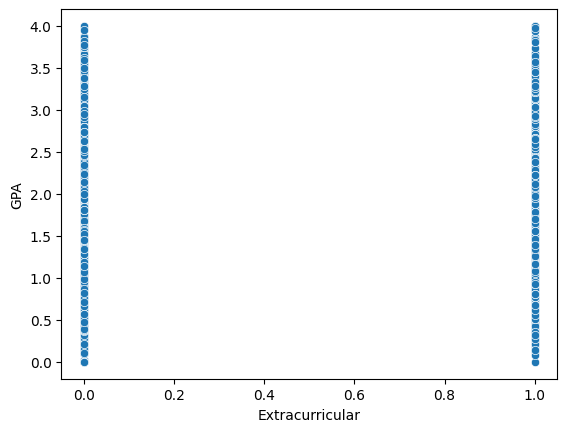

In [11]:
sns.scatterplot(data=df, x='Extracurricular', y='GPA')

<Axes: xlabel='Ethnicity', ylabel='GPA'>

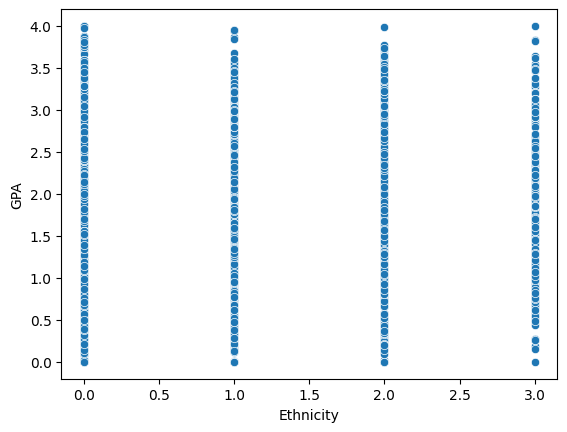

In [12]:
sns.scatterplot(data=df, x='Ethnicity', y='GPA')

<Axes: xlabel='Gender', ylabel='GPA'>

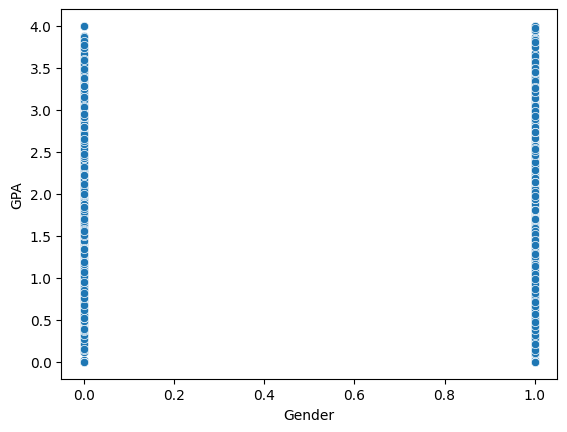

In [13]:
sns.scatterplot(data=df, x='Gender', y='GPA')

<Axes: xlabel='ParentalEducation', ylabel='GPA'>

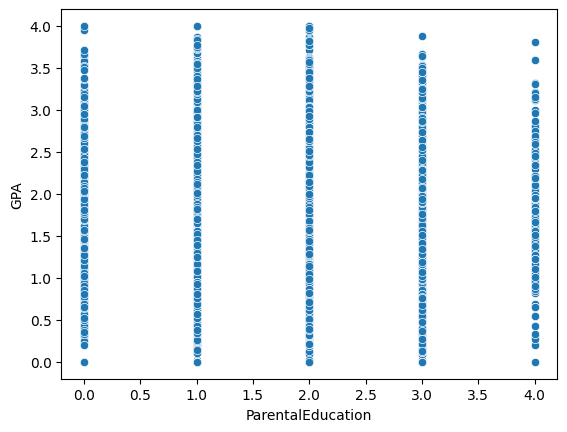

In [14]:
sns.scatterplot(data=df, x='ParentalEducation', y='GPA')

## Logistic Regresion Model

In [15]:
# Feature engineering
def engineer_features(df):
    # Create copies
    df = df.copy()

In [16]:
# Grade Class is target veriable
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Train and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

In [17]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Create and train model
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [19]:
# Predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate
print("Accuracy of Model:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Model: 0.7324414715719063


Classification Report:
               precision    recall  f1-score   support

         0.0       0.33      0.06      0.11        31
         1.0       0.45      0.40      0.42        65
         2.0       0.50      0.64      0.56        90
         3.0       0.70      0.53      0.60       112
         4.0       0.88      0.98      0.92       300

    accuracy                           0.73       598
   macro avg       0.57      0.52      0.52       598
weighted avg       0.71      0.73      0.71       598



In [20]:
# Feature importance
feature_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importance': logreg.coef_[0]
}).sort_values('Importance', ascending=False)
print(feature_importance)

             Variable  Importance
13                GPA    2.552300
0           StudentID    0.550253
8     ParentalSupport    0.334615
6            Absences    0.168562
7            Tutoring    0.147705
9     Extracurricular    0.118239
3           Ethnicity    0.077693
5     StudyTimeWeekly    0.046735
10             Sports    0.004872
1                 Age   -0.001543
4   ParentalEducation   -0.012874
2              Gender   -0.037677
11              Music   -0.101508
12       Volunteering   -0.193120
